# Bài 1: biểu diễn mối quan hệ giữa tuổi tác và bệnh tim.

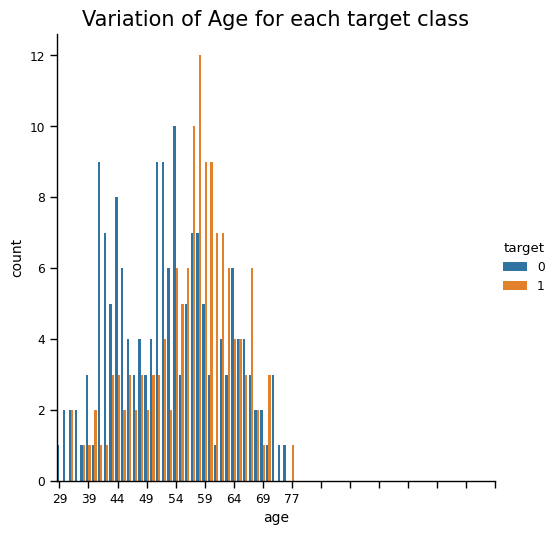

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
sns.set_context("paper", font_scale=1, rc={"font.size": 3,"axes.titlesize": 15,"axes.labelsize": 10})
ax = sns.catplot(kind='count', data=df, x='age', hue='target', order=df['age'].sort_values().unique())
# ax.set(xticklabels=[])
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()


# Bài 2 : biểu diễn mối quan hệ giữa tuổi, giới tính và khả năng bị bệnh

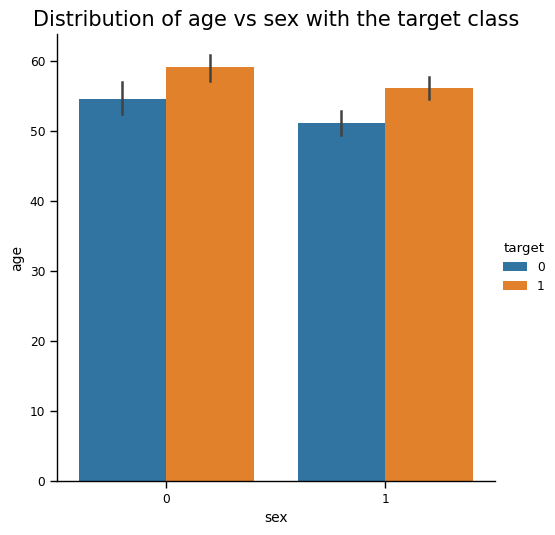

In [ ]:
sns.catplot(kind='bar', data=df, y='age', x='sex', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()


# ***Sử dụng knn dự đoán bệnh tim***


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Phân chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa mô hình
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Huấn luyện mô hình
classifier.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn trên tập test
cm_test = confusion_matrix(y_pred, y_test)

# Dự đoán kết quả trên tập train
y_pred_train = classifier.predict(X_train)

# Tính ma trận nhầm lẫn trên tập train
cm_train = confusion_matrix(y_pred_train, y_train)

# Tính độ chính xác cho train và test
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set = {accuracy_for_train}')
print(f'Accuracy for test set = {accuracy_for_test}')


Accuracy for training set = 0.76
Accuracy for test set = 0.69


# ***Sử dụng SVM dự đoán bệnh tim***

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

# Phân chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa mô hình SVM
svm_classifier = SVC(kernel='rbf', random_state=42)

# Huấn luyện mô hình
svm_classifier.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred = svm_classifier.predict(X_test)

# Tính ma trận nhầm lẫn trên tập test
cm_test = confusion_matrix(y_pred, y_test)

# Dự đoán kết quả trên tập train
y_pred_train = svm_classifier.predict(X_train)

# Tính ma trận nhầm lẫn trên tập train
cm_train = confusion_matrix(y_pred_train, y_train)

# Tính độ chính xác cho train và test
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))


Accuracy for training set for SVC = 0.66
Accuracy for test set for SVC = 0.67


# ***Sử dụng naive bayes dự đoán bệnh tim***

In [ ]:
# Phân chia dữ liệu thành train và test
X = df.iloc[:, :-1].values  # Lấy tất cả các cột, trừ cột cuối cùng (y)
y = df.iloc[:, -1].values  # Lấy cột cuối cùng (y)

# Chia dữ liệu thành train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa và huấn luyện mô hình Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn cho tập test
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

# Dự đoán kết quả trên tập train
y_pred_train = classifier.predict(X_train)

# Tính ma trận nhầm lẫn cho tập train
cm_train = confusion_matrix(y_pred_train, y_train)

# Tính độ chính xác cho tập train và test
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))


Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


# ***sử dụng decision tree dự đoán bệnh tim***


In [ ]:
# Phân chia dữ liệu thành train và test
X = df.iloc[:, :-1].values  # Lấy tất cả các cột, ngoại trừ cột cuối cùng (y)
y = df.iloc[:, -1].values  # Lấy cột cuối cùng (y)

# Chia dữ liệu thành train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa mô hình Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

# Huấn luyện mô hình
classifier.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn cho tập test
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

# Dự đoán kết quả trên tập train
y_pred_train = classifier.predict(X_train)

# Tính ma trận nhầm lẫn cho tập train
cm_train = confusion_matrix(y_pred_train, y_train)

# Tính độ chính xác cho tập train và test
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.75


# ***Sử dụng random forest dự đoán bệnh tim***

In [ ]:
# Phân chia dữ liệu thành train và test
X = df.iloc[:, :-1].values  # Lấy tất cả các cột, ngoại trừ cột cuối cùng (y)
y = df.iloc[:, -1].values  # Lấy cột cuối cùng (y)

# Chia dữ liệu thành train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa mô hình Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)

# Huấn luyện mô hình
classifier.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn cho tập test
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

# Dự đoán kết quả trên tập train
y_pred_train = classifier.predict(X_train)

# Tính ma trận nhầm lẫn cho tập train
cm_train = confusion_matrix(y_pred_train, y_train)

# Tính độ chính xác cho tập train và test
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


# ***Sử dụng adaboost dự đoán bệnh tim***

In [ ]:
# Phân chia dữ liệu thành train và test
X = df.iloc[:, :-1].values  # Lấy tất cả các cột, ngoại trừ cột cuối cùng (y)
y = df.iloc[:, -1].values  # Lấy cột cuối cùng làm nhãn (y)

# Chia dữ liệu thành train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa mô hình AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Huấn luyện mô hình
classifier.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn cho tập test
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

# Dự đoán kết quả trên tập train
y_pred_train = classifier.predict(X_train)

# Tính ma trận nhầm lẫn cho tập train
cm_train = confusion_matrix(y_pred_train, y_train)

# Tính độ chính xác cho tập train và test
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoostClassifier = 0.88
Accuracy for test set for AdaBoostClassifier = 0.9


# ***Sử dụng Gradient boost dự đoán bệnh tim***

In [ ]:
# Phân chia dữ liệu thành train và test
X = df.iloc[:, :-1].values  # Lấy tất cả các cột, ngoại trừ cột cuối cùng (y)
y = df.iloc[:, -1].values  # Lấy cột cuối cùng làm nhãn (y)

# Chia dữ liệu thành train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa mô hình GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                        subsample=1.0, min_samples_split=2,
                                        max_depth=3, random_state=42)

# Huấn luyện mô hình
classifier.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn cho tập test
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

# Dự đoán kết quả trên tập train
y_pred_train = classifier.predict(X_train)

# Tính ma trận nhầm lẫn cho tập train
cm_train = confusion_matrix(y_pred_train, y_train)

# Tính độ chính xác cho tập train và test
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


# ***Sử dụng Xgboost dự đoán bệnh tim***

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier with binary logistic objective
# n_estimators=100 for 100 boosting rounds, random_state for reproducibility
xg = XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100)

# Train the model with training data
xg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg.predict(X_test)

# Confusion matrix to evaluate the predictions on the test set
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

# Predictions for the training set
y_pred_train = xg.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy for the training set and test set using confusion matrix
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print the accuracies for both training and test sets
print('Accuracy for training set for XGBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for XGBoostClassifier = 1.0
Accuracy for test set for XGBoostClassifier = 0.87


# ***Sử dụng Stacking để dự đoán bệnh tim, stacking: kĩ thuật dùng nhiều model để dự đoán sau đó dùng kết quả để meta model dự đoán kết quả cuối dựa trên dữ liệu train là kết quả vừa dự đoán thường là logistic model, xgboost.***

In [ ]:
# Initializing different classifiers

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
gc = GradientBoostingClassifier(random_state=42)
xg = XGBClassifier(random_state=42)
svc = SVC(kernel='linear', random_state=42)
adb = AdaBoostClassifier(random_state=42)

# Defining a Stacking Classifier with the above classifiers as estimators
clf = StackingClassifier(estimators=[
    ('dtc', dtc), ('rfc', rfc),
    ('knn', knn), ('gc', gc),
    ('ad', adb), ('svc', svc)
], final_estimator=xg)  # Final estimator is XGBClassifier

# Fitting the StackingClassifier with the training data
clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test)

# Importing confusion matrix to evaluate predictions
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

# Making predictions for the training set
y_pred_train = clf.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculating accuracy for the training and test sets
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Printing the results
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for StackingClassifier = 0.82
Accuracy for test set for StackingClassifier = 0.92
